In [19]:
from __future__ import print_function
from __future__ import division

from ast import literal_eval

import tensorflow as tf
tf.compat.v1.disable_eager_execution()

import numpy as np
import time
import h5py
import argparse
import os
import sys
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx

import masked_networks
from tf_plus import learning_phase, batchnorm_learning_phase
from tf_plus import sess_run_dict, add_classification_losses
from tf_plus import summarize_weights
from train_supermask import make_parser, read_input_data,     init_model, load_initial_weights, split_and_shape

In [20]:
files = os.listdir('./csvs')
df = pd.read_csv(os.path.join('./csvs', files[-1]))
for f in range(len(files)-1):
    df = df.append(pd.read_csv(os.path.join('./csvs', files[f])))
df.columns = [col.replace(".", "_") for col in df.columns]


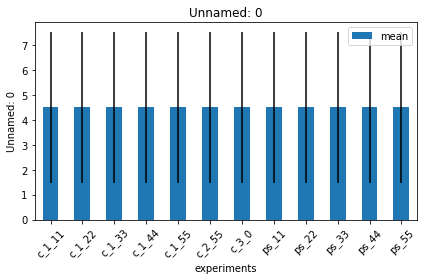

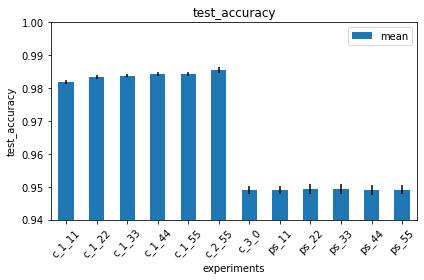

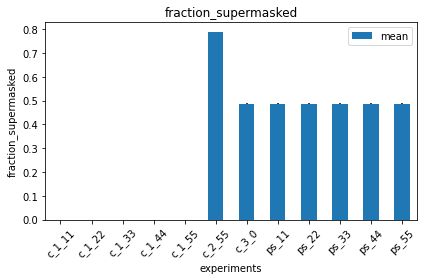

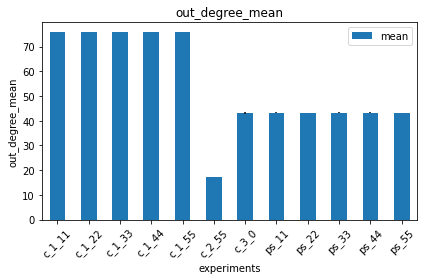

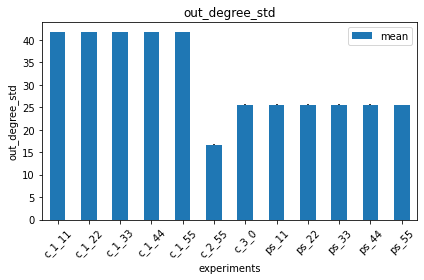

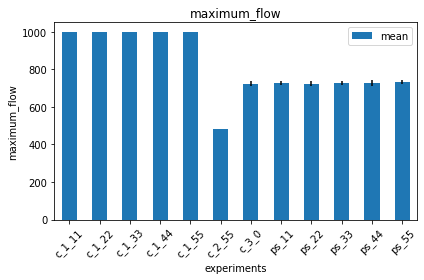

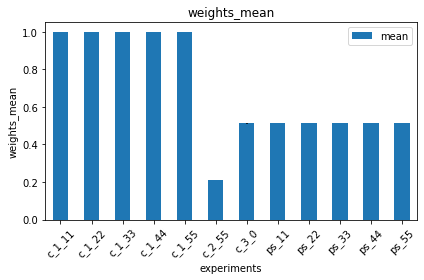

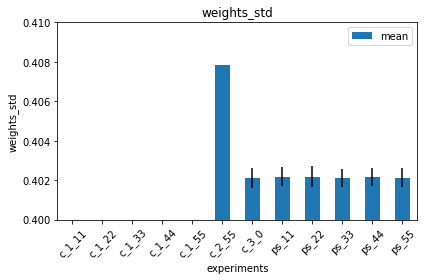

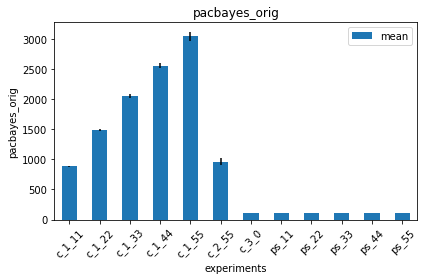

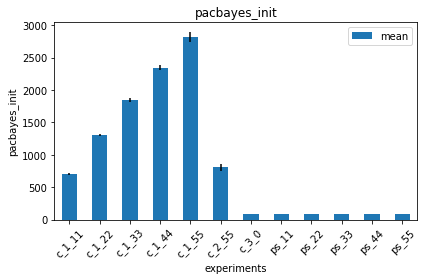

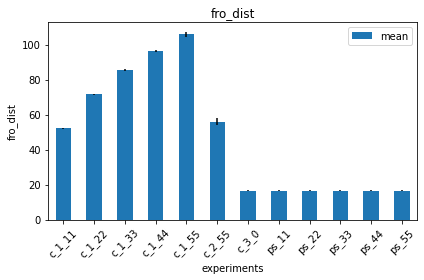

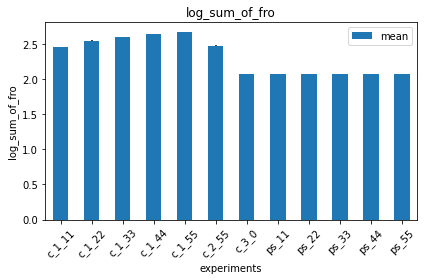

In [21]:
labels = ['c_1_11', 'c_1_22', 'c_1_33', 'c_1_44', 'c_1_55', 'c_2_55', 'c_3_0', 'ps_11', 'ps_22', 'ps_33', 'ps_44', 'ps_55',]
for col in df.columns:
    if col in ['experiment_name', 'regular_epochs', 'supermask_epochs', 'seed', 'has_lth', 'has_supermask', 'ckpt_idx', 'pacbayes_flatness']:
        continue
    test_df = df.groupby(["experiment_name", "regular_epochs"])[col].agg(["mean", "median", "std"]).reset_index()
    ax = test_df.drop(['median', 'std', 'regular_epochs'], axis=1).plot(kind='bar', yerr=test_df['std'])
    ax.set_xticklabels(labels, rotation=45)
    ax.set_ylabel(col)
    ax.set_xlabel("experiments")
    ax.set_title(col)
    if col == "test_accuracy":
        plt.ylim([0.94, 1])
    if col == "weights_std":
        plt.ylim([0.4, 0.41])
    plt.tight_layout()
    plt.savefig("./poster_charts/" + col, facecolor=ax.get_facecolor())